In [4]:
from types import SimpleNamespace
import anomapy.train.sssn as sssn
import pyworld.toolkit.tools.wbutils as wbu
import pyworld.toolkit.tools.torchutils as tu


def distance(model, episode):
    z, d = sssn.distance(model, episode)
    return tu.to_numpy(z), tu.to_numpy(d)


env = "Breakout"
dryruns = sorted([r for r in wbu.dryruns() if env in r])
print(dryruns[-1])

models, config = wbu.load(dryruns[-1]) #load the most recently trained model
model = models['model.pt'].load(sssn.model(**config))
config = SimpleNamespace(**config)

offline-run-20230417_141950-sssn-Breakout-20230417141946
 -- found local run at c:\Users\katla\Downloads\S3N\wandb\offline-run-20230417_141950-sssn-Breakout-20230417141946
 -- failed to find wandb meta data...
 -- found config file.
 -- found 1 model(s): 
 ---- model.pt


In [5]:
import datasets
import numpy as np

dataset = datasets.dataset('aad.anomaly.{0}'.format(env))
dataset.state.transform.to_float().CHW().torch()
anoms = [(a,e[0]) for a,e in dataset.meta.anomaly.items()]
a_episodes = [d for d in dataset.state.load_files(*[e[1] for e in anoms])]
a_labels = [d for d in dataset.label.load_files(*[e[1] for e in anoms])]
a_tlabels = [np.logical_or(l[:-1], l[1:]).astype(np.uint8) for l in a_labels] #transition labels

loading dataset aad.anomaly.Breakout.state...


IntProgress(value=0, max=6)

loading dataset aad.anomaly.Breakout.label...


IntProgress(value=0, max=6)

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score,f1_score
from sklearn.metrics import auc, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score

import plotly
import plotly.graph_objects as go

import pyworld.toolkit.tools.visutils.transform as T
import pyworld.toolkit.tools.visutils.jupyter as J
import pyworld.toolkit.tools.visutils.plot as vplot
import pyworld.toolkit.tools.torchutils as tu
import pyworld.toolkit.tools.fileutils as fu
import pyworld.toolkit.tools.datautils as du


import numpy as n
from pprint import pprint

def roc(label, score):
    assert label.shape[0] == score.shape[0]
    fpr, tpr, _ = roc_curve(label, score)
   
    return fpr, tpr

fprs = []
tprs = []
aucs = {}
precs = []
recs = []
avg_precs = {}
legend = []
for i in range(len(a_episodes[:-1])):
    episode = a_episodes[i]
    anomaly = anoms[i][0]
    label = a_tlabels[i]

    z, score = distance(model, episode)
    latent_space = tu.to_numpy(z)
    score = du.normalise(score)
    fpr, tpr, _ = roc_curve(label, score)
    aucs[anomaly] = auc(fpr, tpr)
    prec, rec, _ = precision_recall_curve(label,score)
    avg_precs[anomaly] = average_precision_score(label,score)
    fprs.append(fpr)
    tprs.append(tpr)
    precs.append(prec)
    recs.append(rec)
    legend.append(anomaly)
    print("\nEpisode", i)
    print(anomaly)
    print("\nAvg Precision Score:\n",avg_precs[anomaly])
    print("\nPrecision:\n",prec)
    print("\nRecall:\n",rec)
    
    #print("\nConfusion Matrix:\n",confusion_matrix(label,score))
    #print("\nRecall\n",recall_score(label,score))
    #print("\nPrecision\n",precision_score(label,score))
    #print("\nF1Score\n",f1_score(label,score))


print("\n\nAverage Precision Scores\n")    
pprint(avg_precs)
# legend[0] = 'flicker'
# legend[1] = 'visual artefact'
# legend = [l.replace('_', ' ') for l in legend]
# print(legend)

# plot = J.plot(fprs, tprs, legend=legend, show=False)
# plot.fig.update_layout(showlegend=True, autosize=False, width=500, height=400, margin=dict(l=5,b=5,r=5,t=5))
# plot.fig.update_layout(dict(legend=dict(xanchor='center', x=0.5, orientation='h')))

#path = "/home/ben/Downloads/rocs/"
#plot.fig.write_image(path + "{0}.png".format(env))
#fu.save(path + "{0}.json".format(env), aucs)




Episode 0
block

Avg Precision Score:
 0.9155208946093999

Precision:
 [0.19008264 0.19025735 0.19043238 ... 1.         1.         1.        ]

Recall:
 [1.         1.         1.         ... 0.00966184 0.00483092 0.        ]

Episode 1
flicker

Avg Precision Score:
 0.5866166247763965

Precision:
 [0.17974322 0.09803922 0.09811617 ... 1.         1.         1.        ]

Recall:
 [1.         0.49603175 0.49603175 ... 0.00793651 0.00396825 0.        ]

Episode 2
freeze

Avg Precision Score:
 0.3356803293111978

Precision:
 [0.36429872 0.05013674 0.05018248 ... 0.         0.         1.        ]

Recall:
 [1.         0.09166667 0.09166667 ... 0.         0.         0.        ]

Episode 3
freeze_skip

Avg Precision Score:
 0.3059837993465002

Precision:
 [0.27404844 0.04204753 0.042086   ... 1.         1.         1.        ]

Recall:
 [1.         0.11616162 0.11616162 ... 0.00505051 0.00252525 0.        ]

Episode 4
split_horizontal

Avg Precision Score:
 0.867548946697728

Precision:
 [0.09

In [1]:
from types import SimpleNamespace
import anomapy.train.sssn as sssn
import pyworld.toolkit.tools.wbutils as wbu
import pyworld.toolkit.tools.torchutils as tu


def distance(model, episode):
    z, d = sssn.distance(model, episode)
    return tu.to_numpy(z), tu.to_numpy(d)


env = "Breakout"
dryruns = sorted([r for r in wbu.dryruns() if env in r])
print(dryruns[-1])

models, config = wbu.load(dryruns[-1]) #load the most recently trained model
model = models['model.pt'].load(sssn.model(**config))
config = SimpleNamespace(**config)

Failed to initialise kaggle.
USING DEVICE: cpu
aad
aad.clean
aad.clean.BeamRider
aad.clean.BeamRider.action
aad.clean.BeamRider.state
aad.clean.Breakout
aad.clean.Breakout.action
aad.clean.Breakout.state
aad.clean.Enduro
aad.clean.Enduro.action
aad.clean.Enduro.state
aad.clean.Pong
aad.clean.Pong.action
aad.clean.Pong.state
aad.clean.Qbert
aad.clean.Qbert.action
aad.clean.Qbert.state
aad.clean.Seaquest
aad.clean.Seaquest.action
aad.clean.Seaquest.state
aad.clean.SpaceInvaders
aad.clean.SpaceInvaders.action
aad.clean.SpaceInvaders.state
aad.raw
aad.raw.BeamRider
aad.raw.BeamRider.action
aad.raw.BeamRider.state
aad.raw.Breakout
aad.raw.Breakout.action
aad.raw.Breakout.state
aad.raw.Enduro
aad.raw.Enduro.action
aad.raw.Enduro.state
aad.raw.Pong
aad.raw.Pong.action
aad.raw.Pong.state
aad.raw.Qbert
aad.raw.Qbert.action
aad.raw.Qbert.state
aad.raw.Seaquest
aad.raw.Seaquest.action
aad.raw.Seaquest.state
aad.raw.SpaceInvaders
aad.raw.SpaceInvaders.action
aad.raw.SpaceInvaders.state
aad.anomaly

In [2]:
import datasets
import numpy as np

dataset = datasets.dataset('aad.anomaly.{0}'.format(env))
dataset.state.transform.to_float().CHW().torch()
anoms = [(a,e[0]) for a,e in dataset.meta.anomaly.items()]
a_episodes = [d for d in dataset.state.load_files(*[e[1] for e in anoms])]
a_labels = [d for d in dataset.label.load_files(*[e[1] for e in anoms])]
a_tlabels = [np.logical_or(l[:-1], l[1:]).astype(np.uint8) for l in a_labels] #transition labels

loading dataset aad.anomaly.Breakout.state...


IntProgress(value=0, max=6)

loading dataset aad.anomaly.Breakout.label...


IntProgress(value=0, max=6)

In [3]:
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score,f1_score
from sklearn.metrics import auc, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score

import plotly
import plotly.graph_objects as go

import pyworld.toolkit.tools.visutils.transform as T
import pyworld.toolkit.tools.visutils.jupyter as J
import pyworld.toolkit.tools.visutils.plot as vplot
import pyworld.toolkit.tools.torchutils as tu
import pyworld.toolkit.tools.fileutils as fu
import pyworld.toolkit.tools.datautils as du


import numpy as n
from pprint import pprint

def roc(label, score):
    assert label.shape[0] == score.shape[0]
    fpr, tpr, _ = roc_curve(label, score)
   
    return fpr, tpr

fprsAL = []
tprsAL = []
aucsAL = {}
precsAL = []
recsAL = []
avg_precsAL = {}
legend = []
for i in range(len(a_episodes[:-1])):
    episode = a_episodes[i]
    anomaly = anoms[i][0]
    label = a_tlabels[i]

    z, score = distance(model, episode)
    latent_space = tu.to_numpy(z)
    score = du.normalise(score)
    fpr, tpr, _ = roc_curve(label, score)
    aucsAL[anomaly] = auc(fpr, tpr)
    prec, rec, _ = precision_recall_curve(label,score)
    avg_precsAL[anomaly] = average_precision_score(label,score)
    fprsAL.append(fpr)
    tprsAL.append(tpr)
    precsAL.append(prec)
    recsAL.append(rec)
    legend.append(anomaly)
    print("\nEpisode", i)
    print(anomaly)
    print("\nAvg Precision Score:\n",avg_precsAL[anomaly])
    print("\nPrecision:\n",prec)
    print("\nRecall:\n",rec)
    
    #print("\nConfusion Matrix:\n",confusion_matrix(label,score))
    #print("\nRecall\n",recall_score(label,score))
    #print("\nPrecision\n",precision_score(label,score))
    #print("\nF1Score\n",f1_score(label,score))


print("\n\nAverage Precision Scores\n")    
pprint(avg_precsAL)
# legend[0] = 'flicker'
# legend[1] = 'visual artefact'
# legend = [l.replace('_', ' ') for l in legend]
# print(legend)

# plot = J.plot(fprs, tprs, legend=legend, show=False)
# plot.fig.update_layout(showlegend=True, autosize=False, width=500, height=400, margin=dict(l=5,b=5,r=5,t=5))
# plot.fig.update_layout(dict(legend=dict(xanchor='center', x=0.5, orientation='h')))

#path = "/home/ben/Downloads/rocs/"
#plot.fig.write_image(path + "{0}.png".format(env))
#fu.save(path + "{0}.json".format(env), aucs)




Episode 0
block

Avg Precision Score:
 0.9958380327478584

Precision:
 [0.19008264 0.19025735 0.19043238 ... 1.         1.         1.        ]

Recall:
 [1.         1.         1.         ... 0.00966184 0.00483092 0.        ]

Episode 1
flicker

Avg Precision Score:
 0.5866166247763965

Precision:
 [0.17974322 0.09803922 0.09811617 ... 1.         1.         1.        ]

Recall:
 [1.         0.49603175 0.49603175 ... 0.00793651 0.00396825 0.        ]

Episode 2
freeze

Avg Precision Score:
 0.3355087773342571

Precision:
 [0.36429872 0.05013674 0.05018248 ... 0.         0.         1.        ]

Recall:
 [1.         0.09166667 0.09166667 ... 0.         0.         0.        ]

Episode 3
freeze_skip

Avg Precision Score:
 0.33274018666044913

Precision:
 [0.27404844 0.04204753 0.042086   ... 1.         1.         1.        ]

Recall:
 [1.         0.11616162 0.11616162 ... 0.00505051 0.00252525 0.        ]

Episode 4
split_horizontal

Avg Precision Score:
 0.9745959805202132

Precision:
 [0.

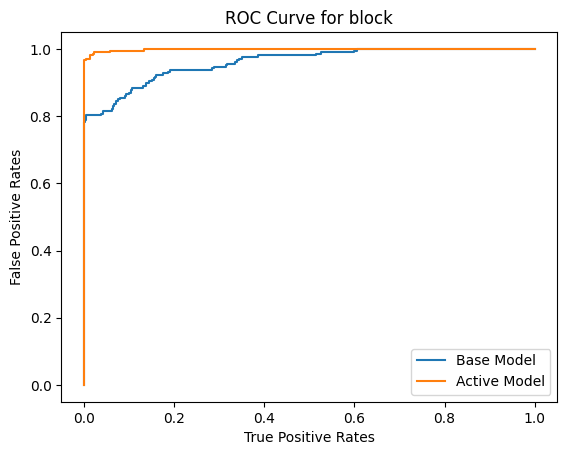

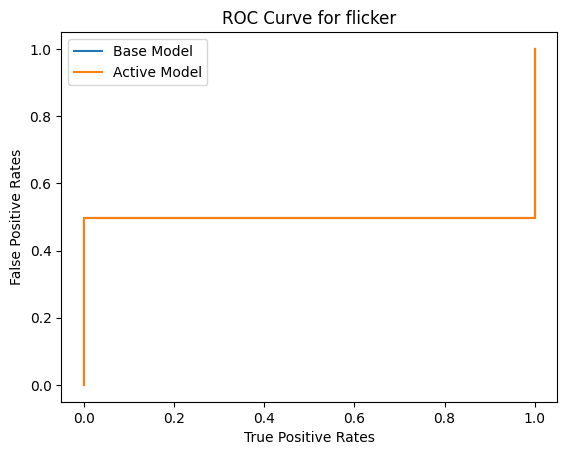

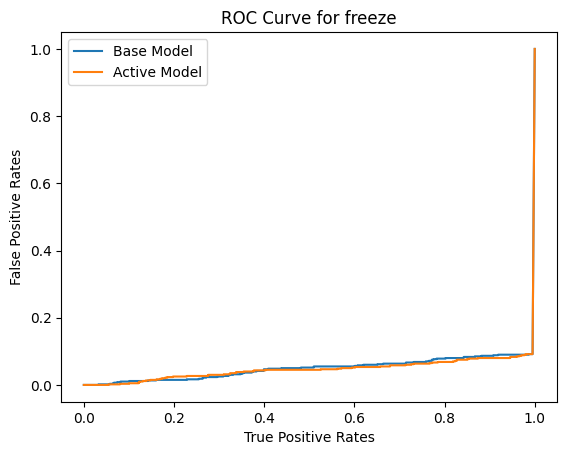

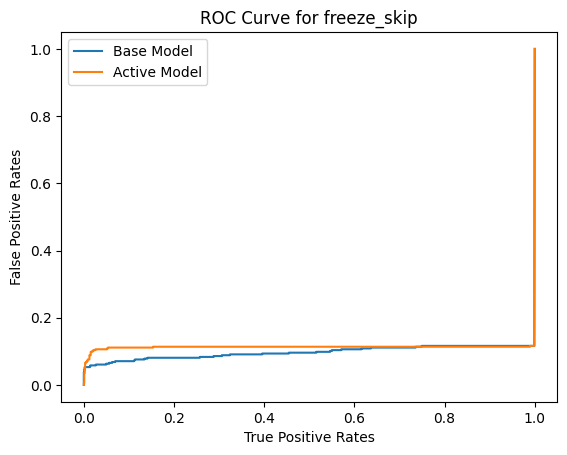

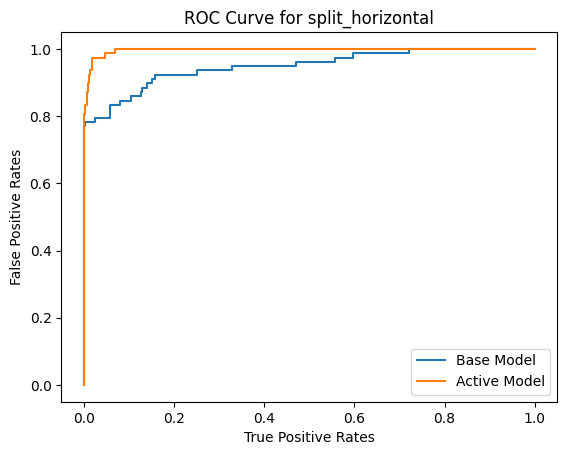

In [13]:
import matplotlib.pyplot as plt
for i in range(len(legend)):
    plt.plot(fprs[i],tprs[i], label = 'Base Model')
    plt.plot(fprsAL[i],tprsAL[i], label = 'Active Model')
    plt.legend()
    plt.xlabel('True Positive Rates')
    plt.ylabel('False Positive Rates')
    plt.title('ROC Curve for '+ legend[i])
    plt.show()

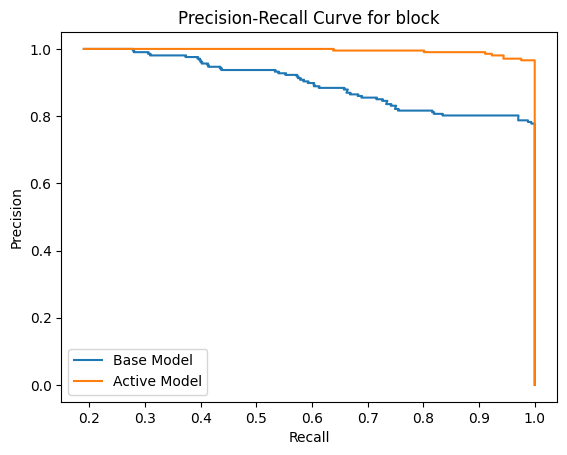

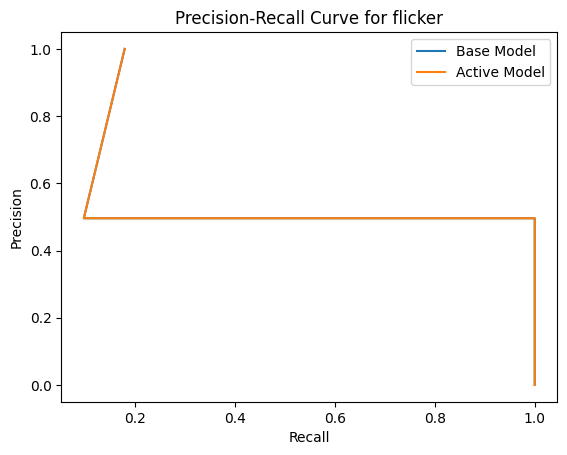

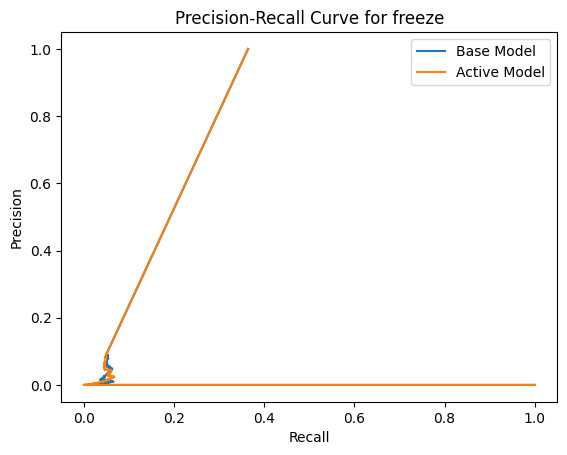

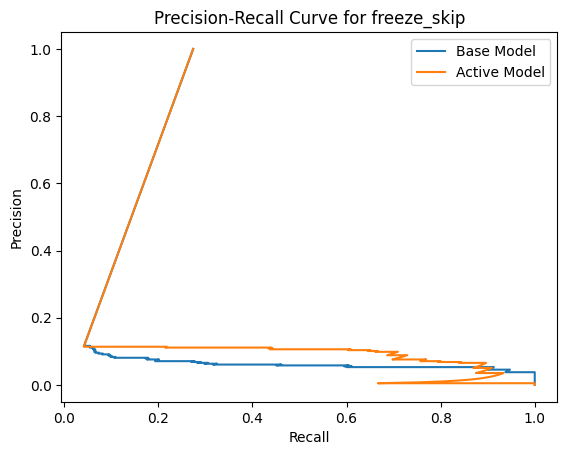

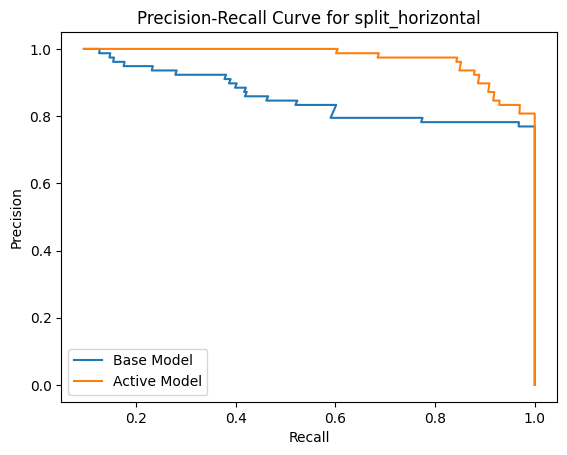

In [12]:
import matplotlib.pyplot as plt
for i in range(len(legend)):
    plt.plot(precs[i],recs[i], label = 'Base Model')
    plt.plot(precsAL[i],recsAL[i], label = 'Active Model')
    plt.legend()
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for '+ legend[i])
    plt.show()